# Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Display properties
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from IPython.display import display, HTML

# Date
import datetime
from datetime import date, timedelta


# Maps
from math import pi

import pickle 



In [2]:
#Sklearn packages

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram



# Read Data

In [3]:
git_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/FIFA19_data.csv'

fifa = pd.read_csv(git_url)

In [4]:
country_url = 'https://raw.githubusercontent.com/nazihkalo/FIFA19-Scouting-Analysis/master/coun_by_cont.csv'

countries_cont = pd.read_csv(country_url)

In [5]:
# Copy of the dataframe
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Missing Value analysis

In [6]:
#Checking dataset for NA values
total_num = fifa.isnull().sum().sort_values(ascending=False)

perc = fifa.isnull().sum()/fifa.isnull().count() *100
perc1 = (round(perc,2).sort_values(ascending=False))

# Creating a data frame:
fifa_null = pd.concat([total_num, perc1], axis =1 , keys =["Total Missing Values", "Percentage %"]).sort_values(by ="Percentage %", ascending = False)

#Top nulls
top_null = fifa_null[fifa_null["Percentage %"]>0]
top_null.reset_index(inplace=True)
top_null.columns = ['index', "Total Missing Values", "Percentage %"]
top_null.head(10)

,index,Total Missing Values,Percentage %
0,Loaned From,16943,93.06
1,RAM,2085,11.45
2,LS,2085,11.45
3,ST,2085,11.45
4,RS,2085,11.45
5,LW,2085,11.45
6,LF,2085,11.45
7,CF,2085,11.45
8,RF,2085,11.45
9,RW,2085,11.45


Text(0.5, 1, 'Missing Values by column')

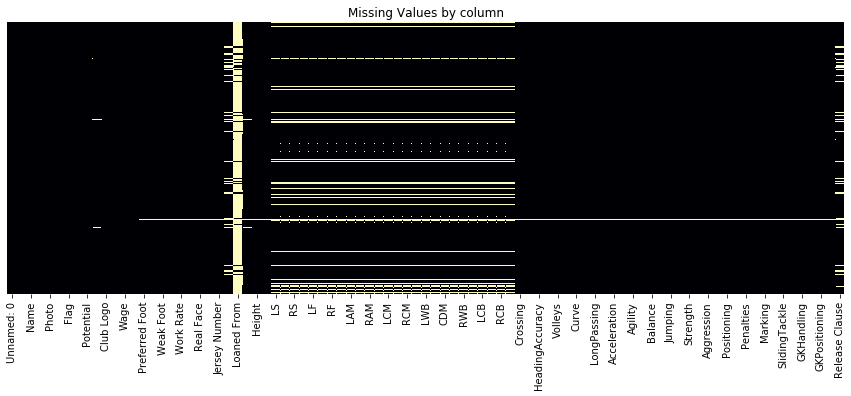

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(fifa.isnull(), cbar = False, yticklabels=False, cmap="magma" )
plt.title('Missing Values by column')

# Feature Engineering

## Dropping Columns 

In [8]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [9]:
#Drop some columns
fifa = fifa.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis = 1)

In [10]:
#Rename unamed to ID
fifa = fifa.rename({'Unnamed: 0' : 'ID'}, axis = 1)

In [11]:
#fifa.replace('nan',np.nan, inplace=True)

## Clean columns 

In [12]:
# The value has some non numeric mark so I extract rigth value
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

#Create float Value column
fifa['Value'] = fifa['Value'].apply(value_to_int)

#Create float Wage Column
fifa['Wage'] = fifa['Wage'].apply(value_to_int)


#Create float Wage Column
fifa['Release Clause'] = fifa['Release Clause'].astype(str)
fifa['Release Clause'] = fifa['Release Clause'].apply(value_to_int)


print(fifa['Value'].head())
print(fifa['Wage'].head())
print(fifa['Release Clause'].head())

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64
0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64
0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64


## Convert Preferred Foot to dummy:  0 = 'Left' & 1 = 'Right'

In [13]:
#Left foot = 0 Right foot = 1
fifa['Preferred Foot'] = fifa['Preferred Foot'].apply(lambda x: 0 if x == 'Left' else 1)

## Fill in null clubs for No_Club

In [14]:
fifa['Club'] = fifa['Club'].fillna('No_Club')

## Create club reputation from the mean of the club's players' reputation

In [15]:
#Add club reputation column
fifa['Club_Reputation'] =  fifa['International Reputation'].groupby(fifa['Club']).transform('mean')


## Seperate the Work Rate column into attacking & defensive work rate. 

This format we decoded from Sofifa documentation.

In [16]:
#Work Rate
fifa['Work Rate'] = fifa['Work Rate'].astype(str)

split_wr = fifa['Work Rate'].str.split('/', n=1, expand = True)

#Create attack/defense work rate from Work rate and drop wr
fifa['Attack_WR'] = split_wr[0]
fifa['Defense_WR'] = split_wr[1]
fifa = fifa.drop('Work Rate', axis = 1)

fifa['Defense_WR'] = fifa['Defense_WR'].str.strip()

## Fill in the limited unique values for bodytype to fit in to 3 main categories: Lean, Stocky & Normal

In [17]:
#Fill in miscellaneous body types 
fifa['Body Type'].replace({'Messi':'Lean', 
                           'Neymar':'Lean', 
                           'Shaqiri':'Stocky', 
                           'Courtois':'Normal', 
                           'Akinfenwa':'Stocky',
                           'PLAYER_BODY_TYPE_25':'Lean',
                           'C. Ronaldo':'Normal'}, inplace = True)


In [18]:
#Drop rows with missing Body Type - these values also are missing most other columns
fifa.dropna(subset=['Body Type'], inplace = True)

## Convert Real Face to dummy: 1 = Yes & 0 = No

In [19]:
#Real Face: Yes = 1 No = 0
fifa['Real Face'] = fifa['Real Face'].apply(lambda x: 1 if x == 'Yes' else 0)

## Create Position Group

In [20]:
#Define position groups
forwards = ['RF', 'ST', 'LW','LF', 'RS', 'LS', 'RW', 'CF' ]
defenders = ['RCB','CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
mids = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']
gk = ['GK']

#Create Function to apply to df
def label_position(row):
    if row['Position'] in forwards:
        return 'Forward'
    if row['Position'] in defenders:
        return 'Defender'
    if row['Position'] in mids:
        return 'Midfielder'
    if row['Position'] in gk:
        return 'GoalKeeper'
    return 'Other'

#Create Position_group column of 4 Main positions
fifa['Position_Group'] = fifa.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
fifa['Position_Group'] = fifa['Position_Group'].astype('category')

## Convert the Joined column to number of days from 2019/01/01

This allows us to use the variable in our value prediction models later on.

In [21]:
fifa['Joined'] = pd.to_datetime(fifa['Joined'], format = '%b %d, %Y')

#Keep only the date 
fifa['Joined'] = fifa['Joined'].dt.date

fifa['Joined'] = [datetime.date(2019, 1, 1) - x for x in fifa['Joined']]

fifa['Joined'] = fifa['Joined'].astype(str)

fifa['Joined'] = fifa.Joined.str.split("days").apply(lambda x: x[0])

fifa['Joined'] = fifa['Joined'].replace('NaT', '0')

fifa['Joined'] = fifa['Joined'].astype(int)

## Conver the Loaned From to a dummy column: 1 = Loaned & 0 = Not Loaned

In [22]:
#Binary - loan or not
fifa.set_value(fifa.index[~fifa['Loaned From'].isnull()],'Loaned From', 1)
fifa.set_value(fifa.index[fifa['Loaned From'].isnull()],'Loaned From', 0)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder
5,5,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,1,4.0,4.0,4.0,Normal,1,LF,10.0,2375,0,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2.121212,High,Medium,Forward
6,6,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,1,4.0,4.0,4.0,Lean,1,RCM,10.0,2344,0,2020,5'8,146lbs,77+3,77+3,77+3,85+3,84+3,84+3,84+3,85+3,87+3,87+3,87+3,86+3,88+3,88+3,88+3,86+3,82+3,81+3,81+3,81+3,82+3,79+3,71+3,71+3,71+3,79+3,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2.090909,High,High,Midfielder
7,7,L. Suárez,31,Uruguay,91,91,FC Bar

## Convert 'Contract Valid Until' to the # of years from 2018 

In [23]:
#Change Contract Valid Until to the years from 2018 

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(str)

fifa['Contract Valid Until'] = [x[-4:] for x in fifa['Contract Valid Until']]

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].replace({'nan': '2018'})

fifa['Contract Valid Until'] = fifa['Contract Valid Until'].astype(int) - 2018

## Convert feet'inches'' string height to centimeters

In [24]:
#Convert height from feet'inches to centimeters

def parse_ht(ht):
    # format: 7'0
    ht_ = ht.split("'")
    ft_ = int(ht_[0])
    in_ = int(ht_[1])
    return round(((12*ft_) + in_)*2.54) 
  
fifa['Height'] = fifa['Height'].apply(lambda x:parse_ht(x))


In [25]:
fifa['Weight'] = fifa['Weight'].astype(str).str.replace('lbs', '').astype(int)

## Seperate the Position Potential part of attribute overall. This is the additional gain a player can expect to get on their position attributes. We make this a column.

In [26]:
fifa['Position_Potential'] = fifa['LS']

def potential(x):
    x = str(x)
    if('+' in x):
        calc = x.split('+')
        return int(calc[1])
    else:
        return int(0)

fifa['Position_Potential'] = fifa['Position_Potential'].apply(potential)

fifa['Position_Potential'].head()


0    2
1    3
2    3
3    0
4    3
Name: Position_Potential, dtype: int64

In [27]:
#Get rid of the +int at the end of the position overall columns
def get_rid(x):
    x = str(x)
    if('+' in x):
        calc = x.split('+')
        return int(calc[0])
    elif x.isdigit():
        return int(x)
    else:
        return int(0)


for column in fifa.loc[:,'LS':'RB']:
    fifa[column] = fifa[column].apply(get_rid)

## Group Skills into what position they are important for. 

Mapping was taken from Sofifa.com which is the original source of the dataset. 

In [28]:
#Create the attribute group mean columns
fifa['Attacking'] = fifa.loc[:,'Crossing':'Volleys'].mean(axis=1)
fifa['Skill'] = fifa.loc[:,'Dribbling':'BallControl'].mean(axis=1)
fifa['Movement'] = fifa.loc[:,'Acceleration':'Balance'].mean(axis=1)
fifa['Power'] = fifa.loc[:,'ShotPower':'LongShots'].mean(axis=1)
fifa['Mentality'] = fifa.loc[:,'Aggression':'Composure'].mean(axis=1)
fifa['Defending'] = fifa.loc[:,'Marking':'SlidingTackle'].mean(axis=1)
fifa['GoalKeeping'] = fifa.loc[:,'GKDiving':'GKReflexes'].mean(axis=1)



## Fill in the empty Position values based on the players' max ability

In [29]:
#Fill in the empty Position values based on the players' max ability

for index, row in fifa.loc[fifa['Position_Group'] == 'Other', ['Attacking', 'Defending', 'GoalKeeping']].iterrows():
    if (row[0] > row[1]) & (row[0] > row[2]):
        fifa.loc[index, 'Position'] = 'ST'
    elif (row[1] > row[0]) & (row[1] > row[2]):
        fifa.loc[index, 'Position'] = 'CB'
    elif(row[2] > row[0]) & (row[2] > row[1]):
        fifa.loc[index, 'Position'] = 'GK'
    else:
        fifa.loc[index, 'Position'] = 'CM'

## Fill Jersey Number with mode from their position

In [30]:
#Fill Jersey Number with mode from their position

for index, row in fifa.loc[fifa['Position_Group'] == 'Other', ['Position', 'Jersey Number']].iterrows():
    if row[0] == 'CB':
        fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'CB']['Jersey Number'].mode().values)
    elif row[0] == 'ST':
        fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'ST']['Jersey Number'].mode().values)
    elif row[0] == 'GK':
        fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'GK']['Jersey Number'].mode().values)
    else:
        fifa.loc[index, 'Jersey Number'] = float(fifa[fifa['Position'] == 'CM']['Jersey Number'].mode().values)


## Fill their Position_Group for these new imputed positions

In [31]:
#Fill their Position_Group for these new imputed positions

#Create Position_group column of 4 Main positions
fifa['Position_Group'] = fifa.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
fifa['Position_Group'] = fifa['Position_Group'].astype('category')

In [32]:
#Create Potential - Difference column to measure improvement potential
fifa['Potential_Difference'] = fifa['Potential'] - fifa['Overall']

## Create continent column by matching the nationalities to their respective continent

In [34]:
fifa = fifa.merge(countries_cont, how = 'left', left_on = 'Nationality', right_on = 'Country')

fifa = fifa.drop('Country', axis = 1)

## Impute the 0 Wage rows with the mean wage from their Overall Group

In [35]:
#Find mean wage by overall quartiles
wage_groups = fifa.groupby(pd.qcut(fifa['Overall'],4)).mean()['Wage']

#Fill the 0 wages with group mean
for index, row in fifa.loc[fifa['Wage'] == 0, ['Wage', 'Overall']].iterrows():
    if row[1] <= 62:
        fifa.loc[index, 'Wage'] = round(wage_groups[0])
    elif (row[1] >62) &  (row[1] <= 66):
        fifa.loc[index, 'Wage'] = round(wage_groups[1])
    elif (row[1] > 66) &  (row[1] <= 71):
        fifa.loc[index, 'Wage'] = round(wage_groups[2])
    elif row[1] >71:
        fifa.loc[index, 'Wage'] = round(wage_groups[3])
    else:
        fifa.loc[index, 'Wage'] = 0

# Exploratory Data Analysis 

## Age Analysis
#### Histogram: number of players's age

Mean Age =  25.12
Median Age =  25.0
SD Age =  4.67


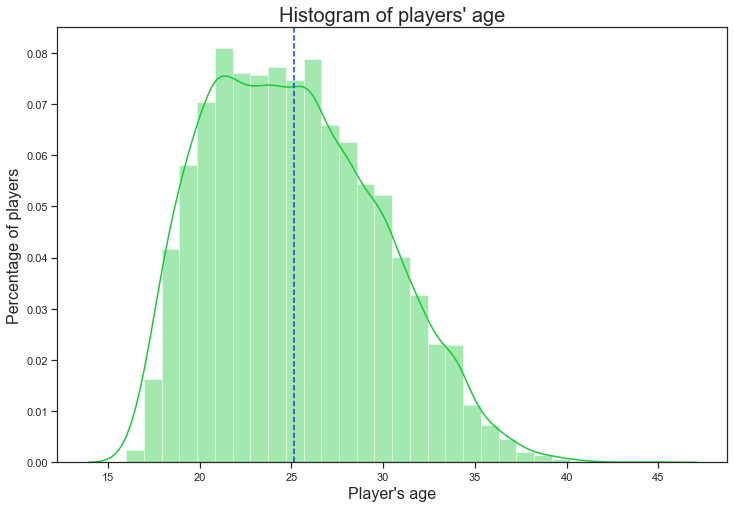

In [36]:
# Histogram: number of players's age
sns.set(style ="ticks", palette = 'bright', color_codes=True)

x = fifa.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 30, kde = True, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Percentage of players', fontsize=16)
ax.set_title(label="Histogram of players' age", fontsize=20)

plt.axvline(x =fifa['Age'].mean(), ymin = 0, ymax = 1, linestyle = '--')

#Add legend for mean line

print('Mean Age = ', round(fifa['Age'].mean(),2))
print('Median Age = ', round(fifa['Age'].median(),2))
print('SD Age = ', round(fifa['Age'].std(),2))


plt.show()

Mean Overall =  66.25
Median Overall =  66.0
SD Overall =  6.91


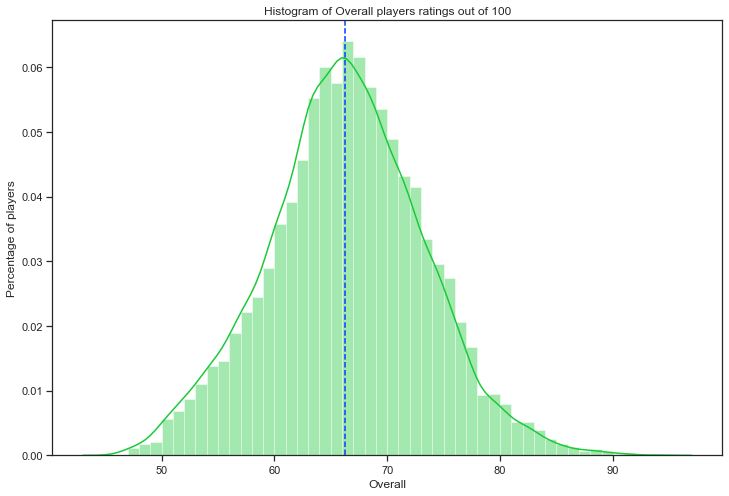

In [37]:
plt.figure(figsize = (12,8))
ax = sns.distplot(fifa['Overall'], bins = 48, kde = True, color = 'g')
#plt.annotate(('Mean = '+ str(round(fifa['Overall'].mean(),2))), (64,1150), color = 'blue')

ax.set_ylabel(ylabel='Percentage of players', fontsize=12)


plt.axvline(x =fifa['Overall'].mean(), ymin = 0, ymax = 1, linestyle = '--')

print('Mean Overall = ', round(fifa['Overall'].mean(),2))
print('Median Overall = ', round(fifa['Overall'].median(),2))
print('SD Overall = ', round(fifa['Overall'].std(),2))


plt.title('Histogram of Overall players ratings out of 100')
plt.show()

### Create age bins for visualization

In [39]:
#Create 5 age bins
age_overall = pd.DataFrame(fifa.groupby(pd.qcut(fifa['Age'], 5)).mean()[['Overall', 'Potential']]).reset_index()
age_overall['Age'] = ['16-21', '21-23', '23-26', '26-29', '29+']

,Overall,Potential
Age,,
16-21,60.82,73.24
21-23,65.63,72.70
23-26,67.96,71.20
26-29,69.15,69.53
29+,69.45,69.45


Text(0.5, 1.0, 'Potential Distribution by Age Groups')

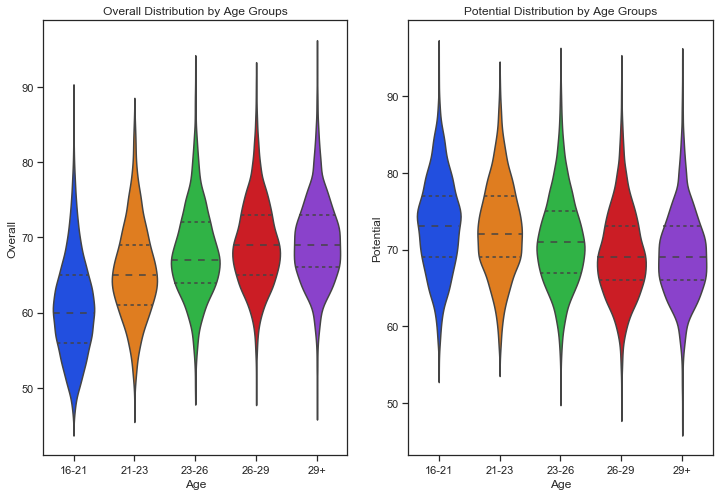

In [40]:

fig, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (12,8))

sns.violinplot(x = pd.qcut(fifa['Age'], 5), y= 'Overall', data = fifa, inner = 'quartile', ax = ax[0])
ax[0].set_xticklabels(['16-21', '21-23', '23-26', '26-29', '29+'])
ax[0].set_ylabel('Overall')
ax[0].set_title('Overall Distribution by Age Groups')


display(age_overall.round(2).set_index('Age'))

sns.violinplot(x = pd.qcut(fifa['Age'], 5), y= 'Potential', data = fifa, inner = 'quartile', ax = ax[1])
ax[1].set_xticklabels(['16-21', '21-23', '23-26', '26-29', '29+'])
ax[1].set_ylabel('Potential')
ax[1].set_title('Potential Distribution by Age Groups')


### Look at Overall distribution by continent of the player

Text(0.5, 1.0, 'Overall Distribution by Continent')

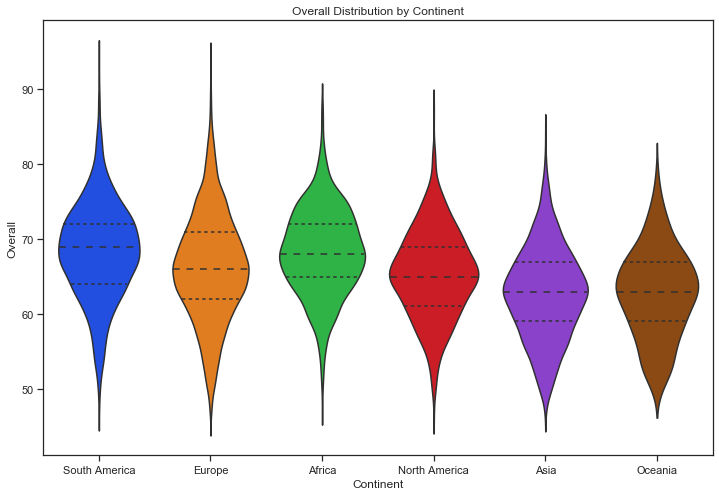

In [41]:
plt.figure(figsize = (12,8))


ax = sns.violinplot(x = 'Continent', y= 'Overall', data = fifa, inner = 'quartile', scale = 'area')
ax.set_title('Overall Distribution by Continent')


# Value (Target Variable) Analysis

Let's look at value by continent. It looks like players from South America have the most skewed distribution for value and the distributions differ significantly between other continents. We will keep this categorical feature for our model prediction.

Text(0.5, 1.0, 'Overall Distribution by Continent')

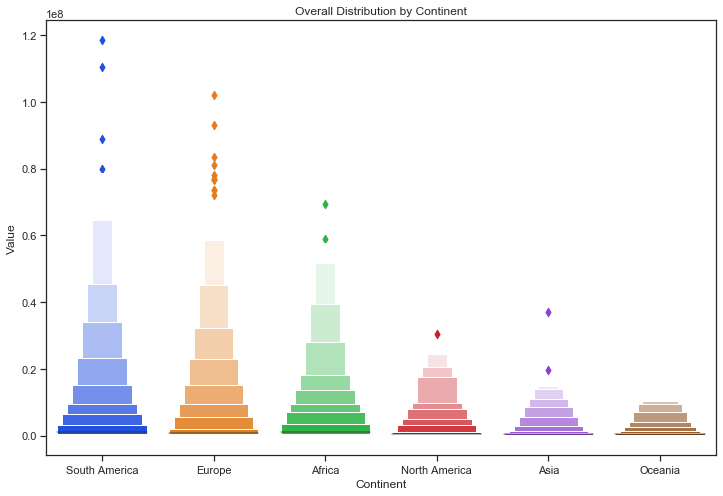

In [42]:
plt.figure(figsize = (12,8))
ax = sns.boxenplot(x= 'Continent', y= 'Value', data = fifa, scale = 'linear')
ax.set_title('Overall Distribution by Continent')

## Age vs. Overall Jointplot 

Let's look at how overall and age are distributed with respect to each other through a jointplot. Looks like overall peaks around age ~26 and then plateaus. 

<Figure size 864x576 with 0 Axes>

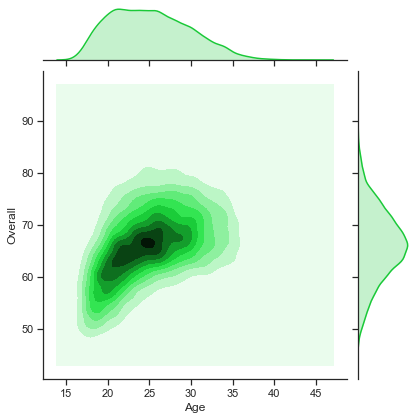

In [43]:
plt.figure(figsize = (12,8))

sns.jointplot(x= 'Age', y = 'Overall', data=fifa,
              kind="kde", color="g")


## Jointplot of value vs. overall

Clearly, value & overall have a positive relationship. However, the skewed distribution of value makes the relationship exponential. 

Wage/Value Correlation =  0.86


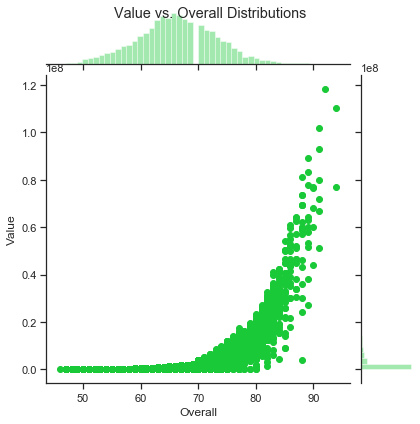

In [44]:
ax = sns.jointplot(x= 'Overall', y = 'Value', data=fifa,
              kind="scatter" ,color="g", )

ax.fig.suptitle('Value vs. Overall Distributions')

print('Wage/Value Correlation = ', round(fifa.Wage.corr(fifa.Value), 2))


## Is Jersey Number correlated with Value?

Interestingly there seems to be some non-random relationship between these two variables. It looks like certain Jersey numbers have higher value observations. These are likely the coveted numbers and/or those associated with players in better positions. 

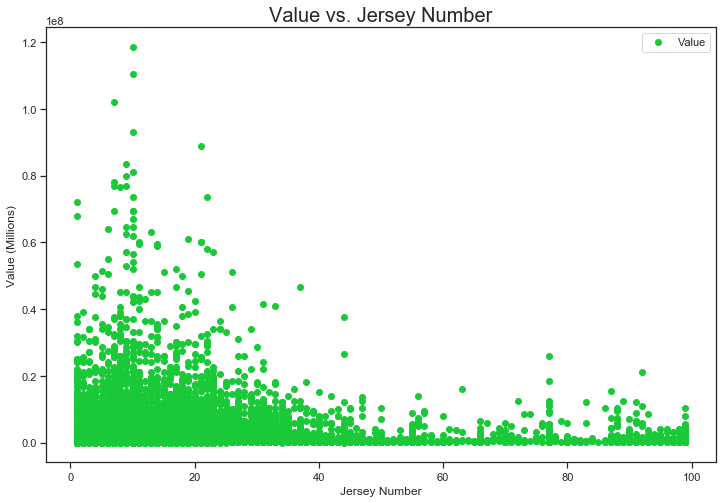

In [45]:
# Value vs. Jersey Number
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(x = 'Jersey Number', y = 'Value' , color= 'g' ,data = fifa)

plt.ylabel('Value (Millions)')
plt.xlabel('Jersey Number')
plt.title('Value vs. Jersey Number', fontsize = 20)
plt.legend()

## Value vs. Wage

This is an obvious highly correlated relationship, nevertheless it is important to confirm.

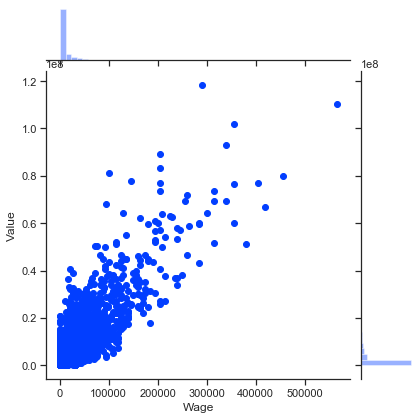

In [46]:
sns.jointplot(x = 'Wage', y = 'Value', data = fifa)


Text(0.5, 1.0, 'Value vs. Special')

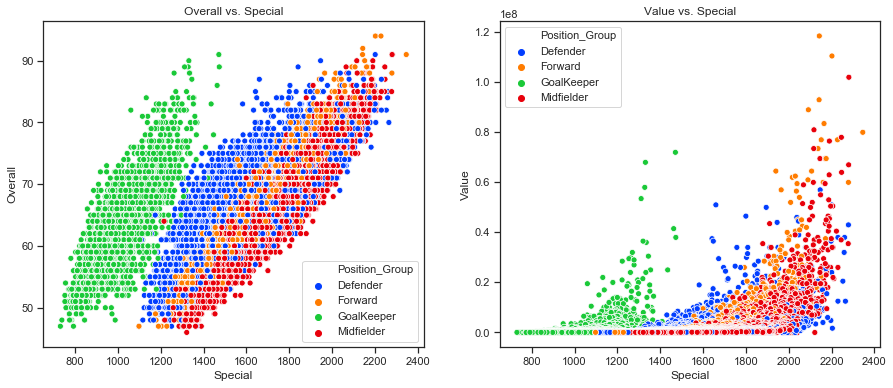

In [180]:
fig, ax = plt.subplots(1,2,figsize = (15,6))

sns.scatterplot('Special','Overall', data = fifa, hue = 'Position_Group', ax = ax[0])

ax[0].set_title('Overall vs. Special')

sns.scatterplot('Special','Value', data = fifa, hue = 'Position_Group',ax = ax[1])

ax[1].set_title('Value vs. Special')

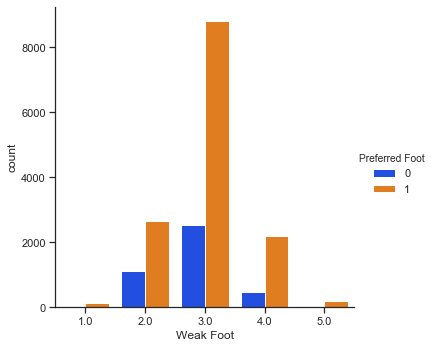

In [181]:
# Move to appendix for now
sns.catplot(x = 'Weak Foot', hue = 'Preferred Foot' ,kind = 'count', data = fifa)

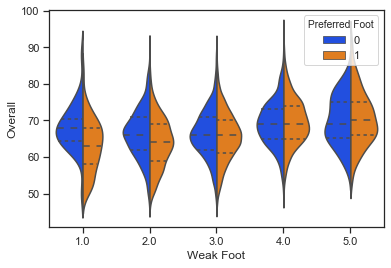

In [182]:
# Move to appendix for now

sns.violinplot(x='Weak Foot', 
               y='Overall', 
               hue='Preferred Foot', 
               data=fifa, 
               split=True,inner='quart', scale = 'area' )

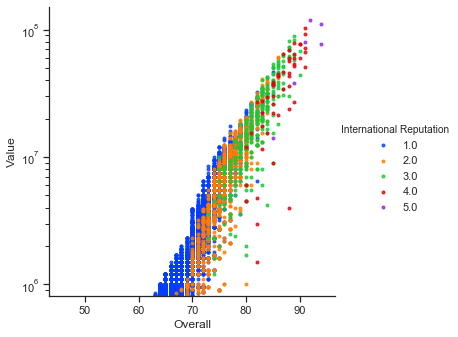

In [183]:
# Move to appendix for now

ax= sns.lmplot(x= 'Overall', y='Value', hue ='International Reputation', data=fifa, fit_reg = False, markers = '.', )

ax.set(yscale="log",)

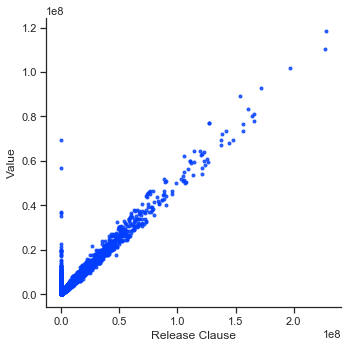

In [184]:
ax= sns.lmplot(x= 'Release Clause', y='Value', data=fifa, fit_reg = False, markers = '.', )


<Figure size 1080x864 with 0 Axes>

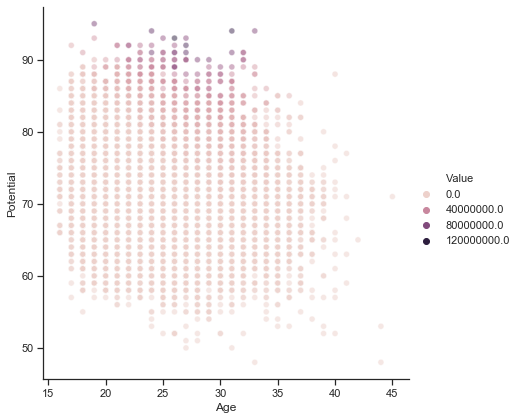

In [185]:
# Relation potential and age with respected value of players
plt.figure(figsize = (15,12))

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.relplot(x="Age", y="Potential", hue='Value', 
            sizes=(40, 400), alpha=.5,
            height=6, data=fifa);

## Position Analysis

### Count of Players by Position

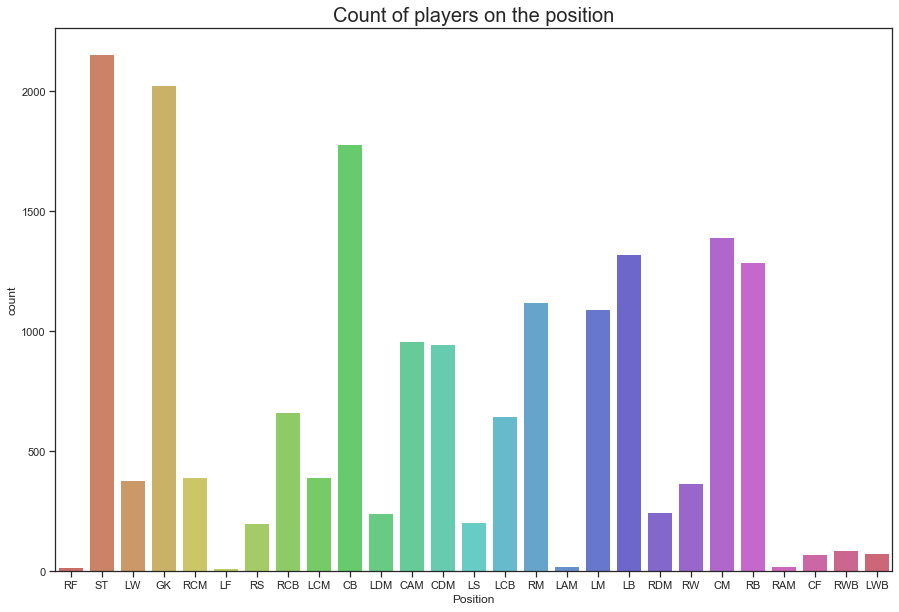

In [186]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position', data = fifa, palette = 'hls');
ax.set_title(label='Count of players on the position', fontsize=20);

### Count of Players by Grouped Position

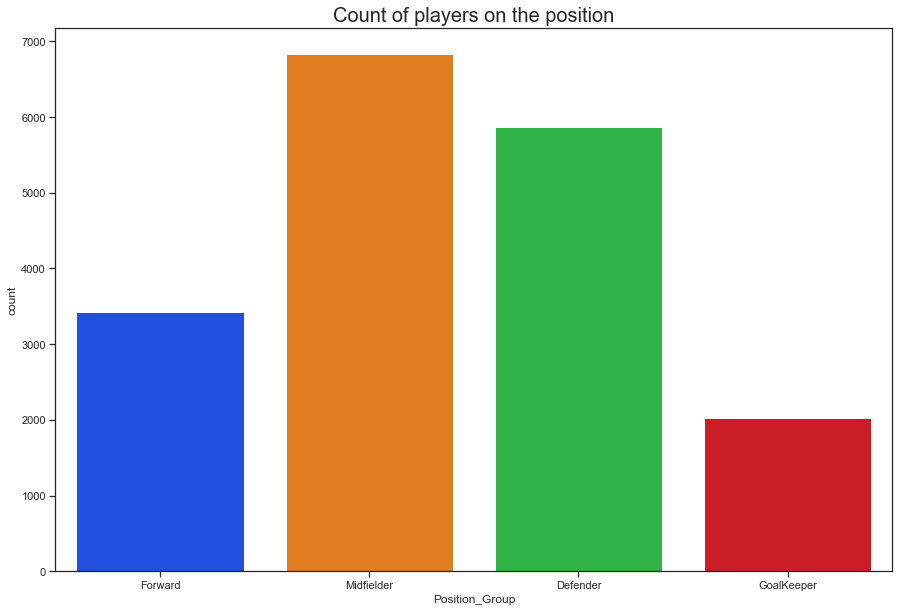

In [187]:
# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position_Group', data = fifa,
                   order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])

ax.set_title(label='Count of players on the position', fontsize=20);

### Value distribution by position - as stripplot

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the stripplot function without specifying `order` is likely to produce an incorrect plot.



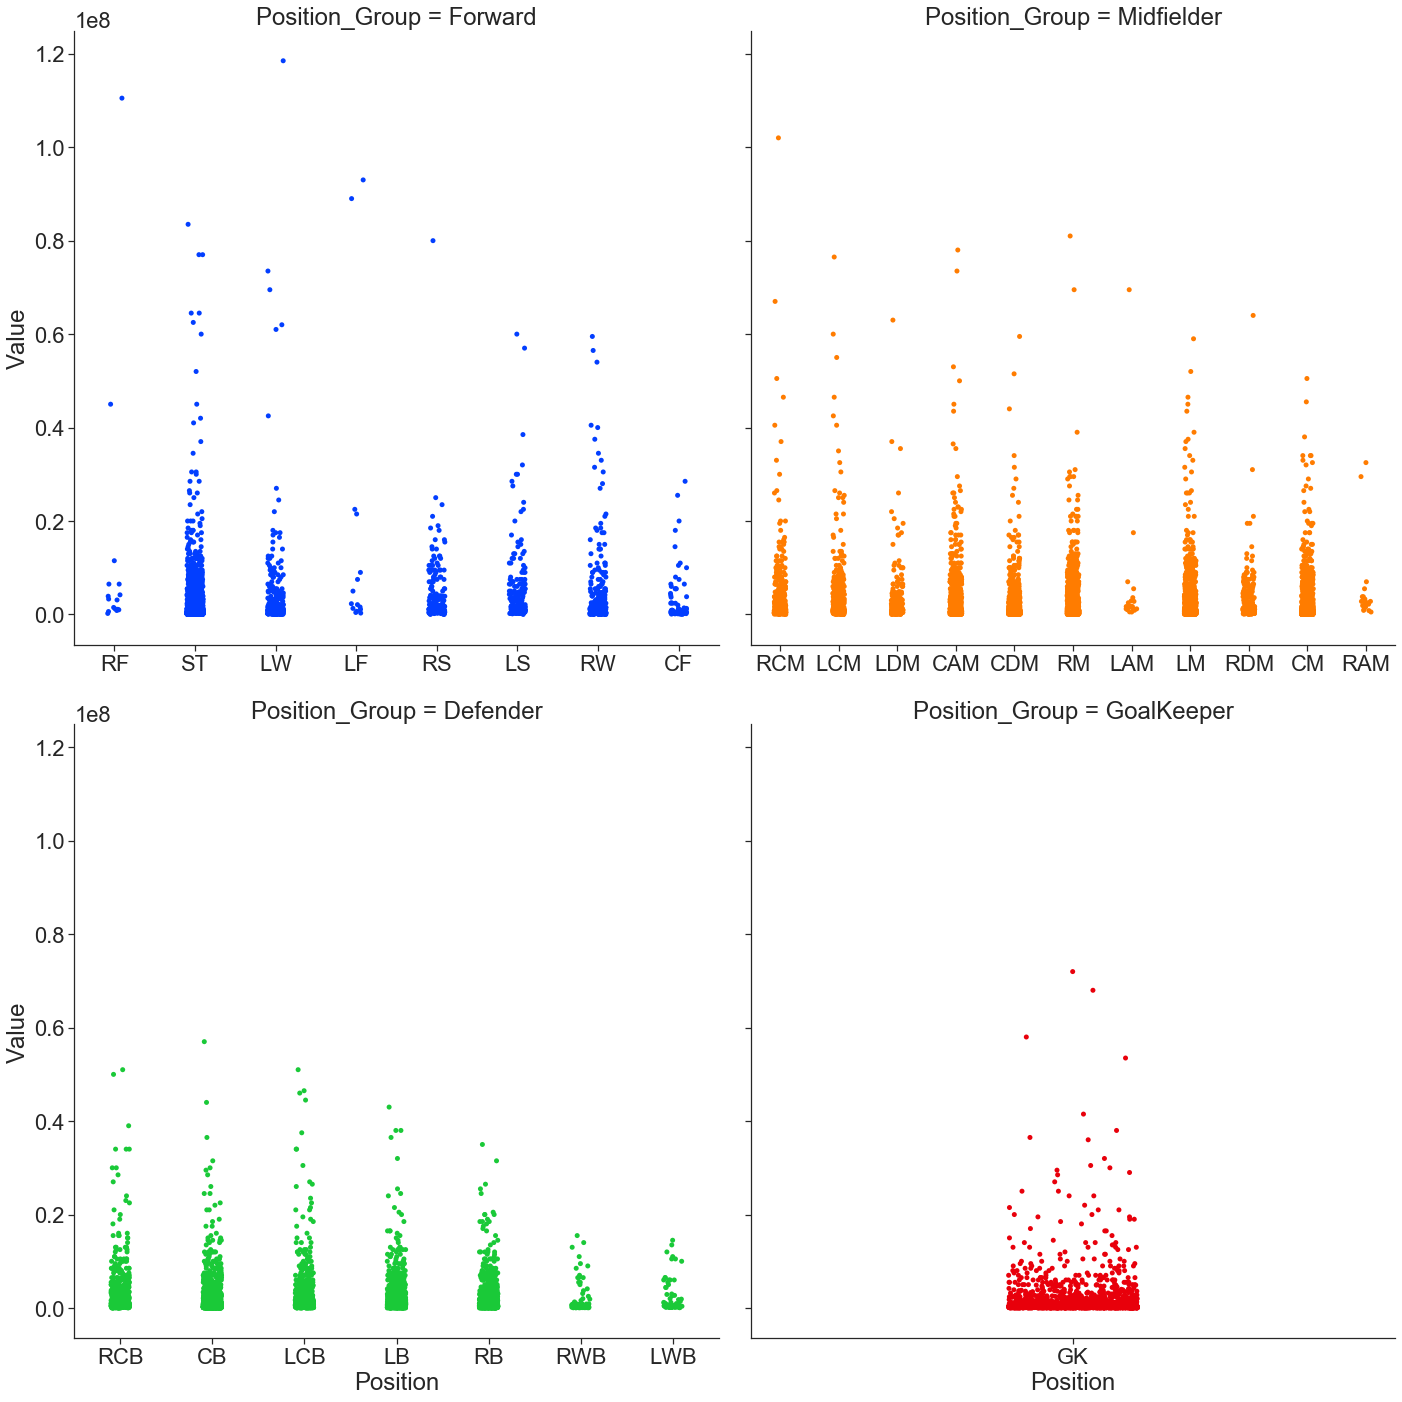

In [55]:
sns.set(font_scale=2, style ="ticks", palette = 'bright', color_codes=True)

g = sns.FacetGrid(fifa, col="Position_Group", hue = 'Position_Group',
                  hue_order= ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'],
                  col_order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper']
                  ,sharex=False, sharey=True, col_wrap=2, height=10)

g.map(sns.stripplot, 'Position' ,"Value" )

sns.set(font_scale=1, style ="ticks", palette = 'bright', color_codes=True)

### Value distributions by Position Group (attack, mid, defender & GK)

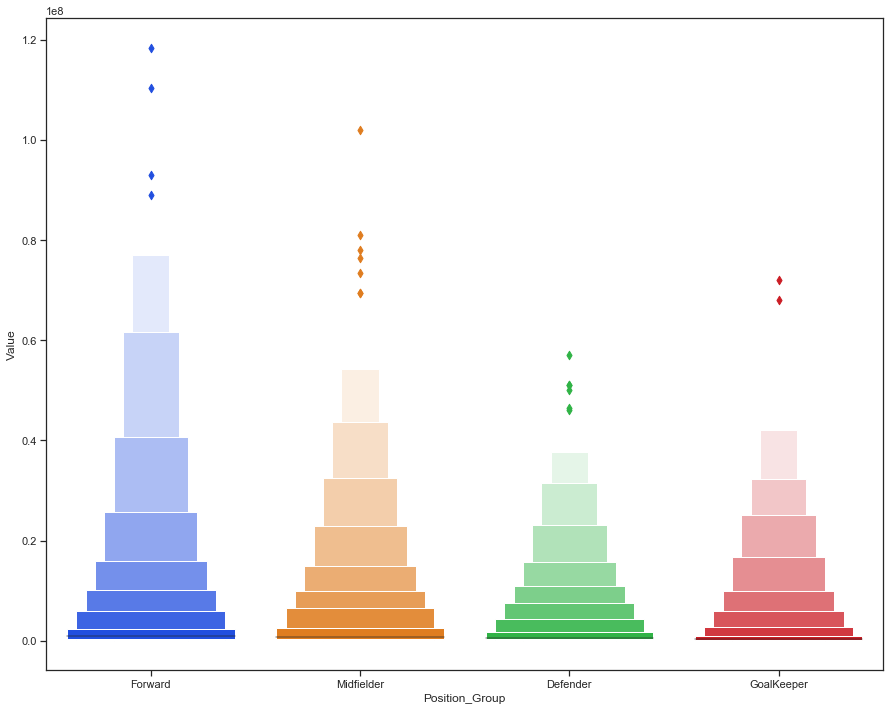

In [56]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))

ax = sns.boxenplot(x= 'Position_Group', y= 'Value', data = fifa, scale = 'linear',
            order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])


### Value Stripplot by number of years left in contract 

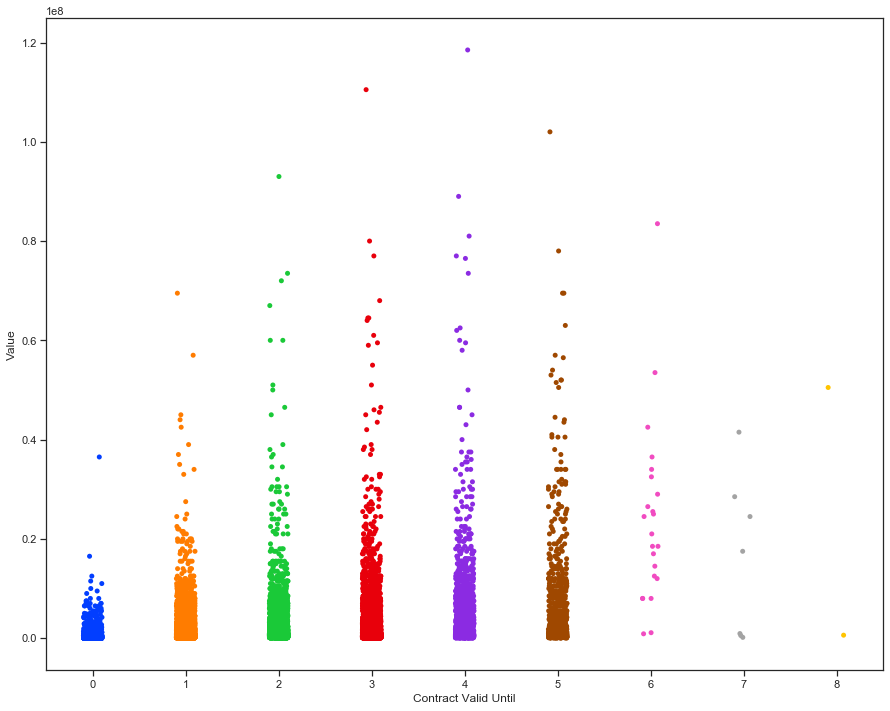

In [190]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(15, 12))


ax = sns.stripplot('Contract Valid Until','Value', data = fifa)

## Correlation/Relationship Analysis

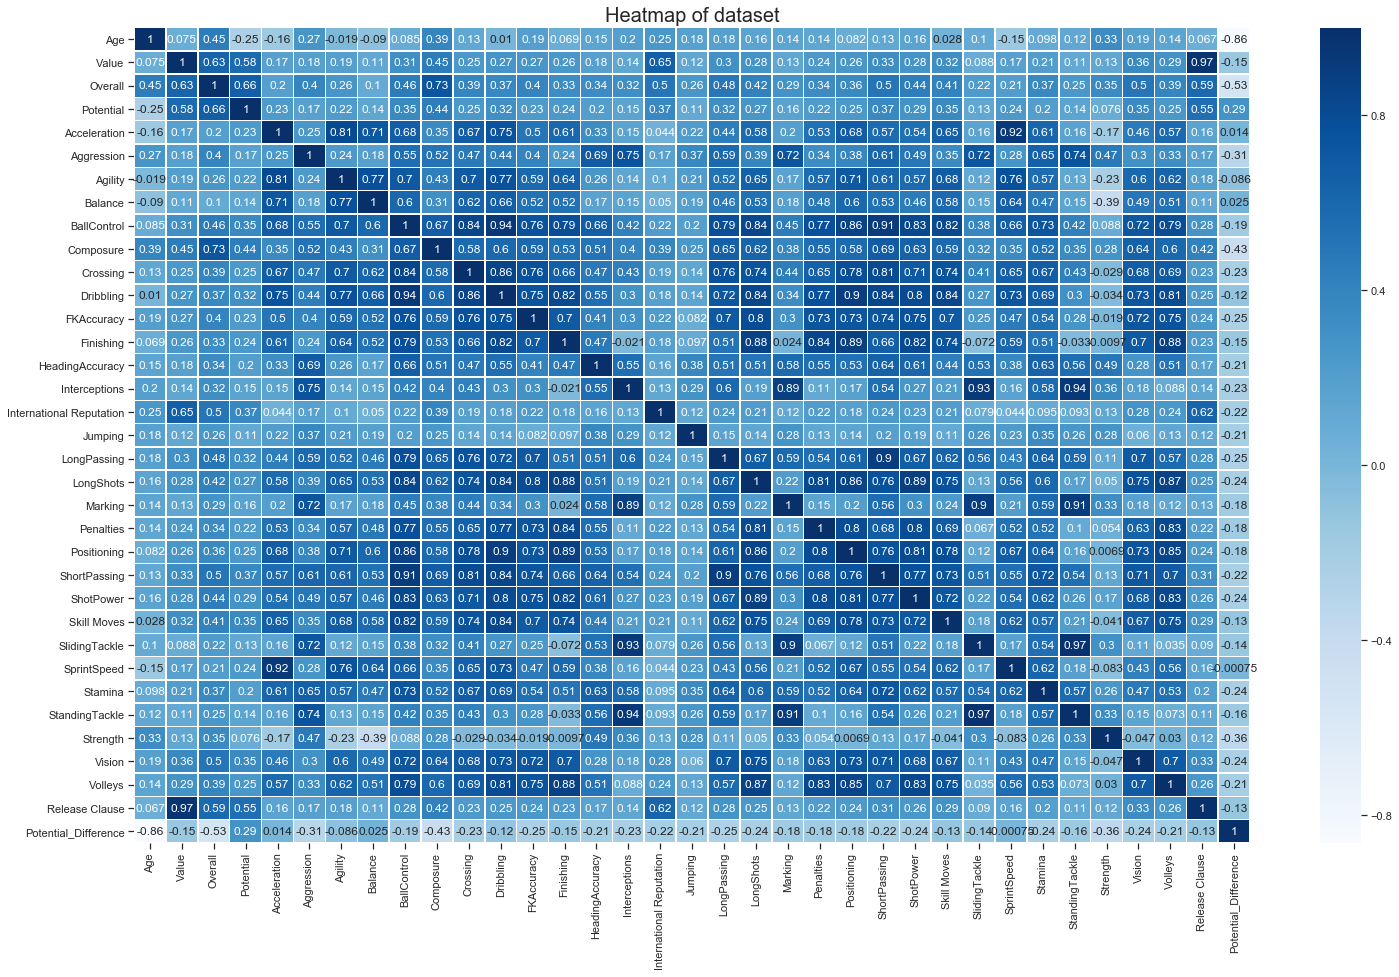

In [53]:
# Correlation heatmap
#plt.rcParams['figure.figsize']=(25,16)

f, ax = plt.subplots(figsize=(25, 15))

hm=sns.heatmap(fifa[['Age', 'Value', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys', 'Release Clause', 'Potential_Difference']].corr(), annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;

### Correlation map limited to Value, Overall & Age

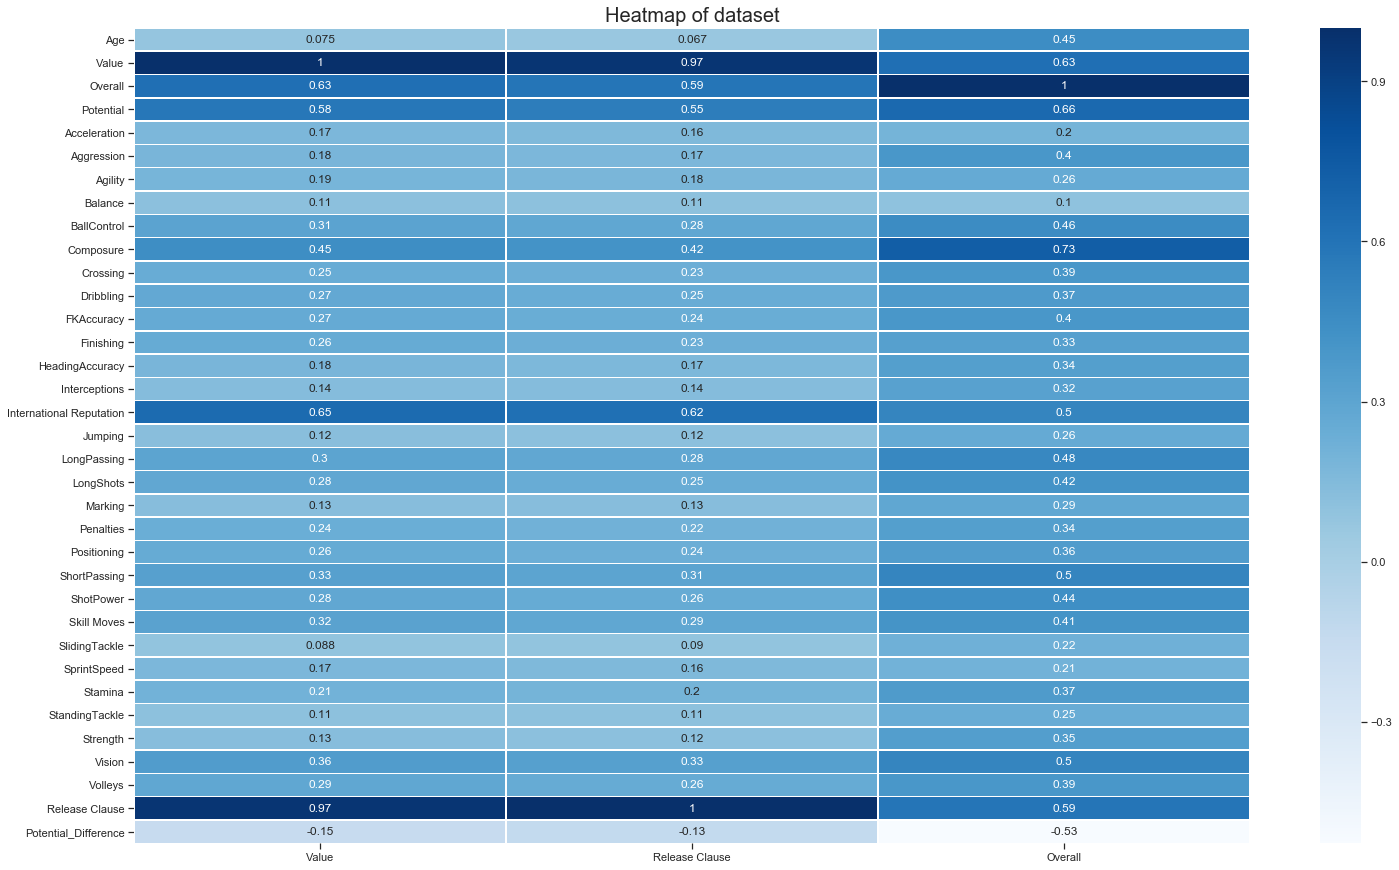

In [54]:
# Correlation heatmap
#plt.rcParams['figure.figsize']=(25,16)

f, ax = plt.subplots(figsize=(25, 15))

hm=sns.heatmap(fifa[['Age', 'Value', 'Overall', 'Potential',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Jumping', 'LongPassing', 'LongShots',
                'Marking', 'Penalties', 'Position', 'Positioning',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys', 'Release Clause', 'Potential_Difference']].corr()[['Value', 'Age', 'Overall']], annot = True, linewidths=.5, cmap='Blues')
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;






## Additional Feature Engineering

In [194]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Club_Reputation,Attack_WR,Defense_WR,Position_Group,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Continent
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,0,5.0,4.0,4.0,Lean,1,RF,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2.242424,Medium,Medium,Forward,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,South America
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,1,5.0,4.0,5.0,Normal,1,ST,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2.520000,High,Low,Forward,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,Europe
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,1,5.0,5.0,5.0,Lean,1,LW,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2.233333,High,Medium,Forward,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,South America
3,3,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,1,4.0,3.0,1.0,Lean,1,GK,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2.090909,Medium,Medium,GoalKeeper,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,Europe
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,1,4.0,5.0,4.0,Normal,1,RCM,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2.090909,High,High,Midfielder,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,Europe


In [57]:
#DROP these columns first
drop_cols = ['ID', 'Name','Nationality','Club']
numeric_cols = list(fifa.dtypes[(fifa.dtypes == 'float64')|(fifa.dtypes == 'int64')].index)

#Dummy Predictors
fifa_dumm_cols = fifa.loc[:, ['Position', 'Continent', 'Position_Group']]

#Ordinal Predictors
fifa_ordinal_cols = fifa.loc[:, ['Body Type', 'Attack_WR', 'Defense_WR']]

#Numerical Predictors
fifa_numeric_cols = fifa[numeric_cols]
fifa_numeric_cols = fifa_numeric_cols.drop(['ID', 'Wage','Value','Release Clause'], axis = 1)

In [58]:
#Getting dummy dataframe for nominal variables
dummy_df = pd.get_dummies(fifa_dumm_cols)

#Mapping ordinal column values
b_type_map = {"Lean": 1, "Normal": 2, "Stocky": 3}
wr_map = {"Low": 1, "Medium": 2, "High": 3}

fifa_ordinal_cols['Body Type'] = fifa_ordinal_cols['Body Type'].map(b_type_map)
fifa_ordinal_cols['Attack_WR'] = fifa_ordinal_cols['Attack_WR'].map(wr_map)
fifa_ordinal_cols['Defense_WR'] = fifa_ordinal_cols['Defense_WR'].map(wr_map)

In [59]:
print(fifa_ordinal_cols.shape)
print(dummy_df.shape)
print(fifa_numeric_cols.shape)

(18159, 3)
(18159, 37)
(18159, 85)


In [61]:
predictors_df = pd.concat([fifa_numeric_cols,fifa_ordinal_cols, dummy_df], axis=1) 

target_val = fifa.Value

target_wage = fifa.Wage

In [62]:
predictors_df.head()

,Age,Overall,Potential,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Real Face,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Club_Reputation,Position_Potential,Attacking,Skill,Movement,Power,Mentality,Defending,GoalKeeping,Potential_Difference,Body Type,Attack_WR,Defense_WR,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LAM,Position_LB,Position_LCB,Position_LCM,Position_LDM,Position_LF,Position_LM,Position_LS,Position_LW,Position_LWB,Position_RAM,Position_RB,Position_RCB,Position_RCM,Position_RDM,Position_RF,Position_RM,Position_RS,Position_RW,Position_RWB,Position_ST,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Position_Group_Defender,Position_Group_Forward,Position_Group_GoalKeeper,Position_Group_Midfielder
0,31,94,94,2202,0,5.0,4.0,4.0,1,10.0,5297,0,3,170,159,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,...,2.242424,2,85.0,93.4,91.6,75.6,71.500000,29.000000,10.8,0,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,33,94,94,2228,1,5.0,4.0,5.0,1,7.0,175,0,4,188,183,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,...,2.520000,3,87.0,83.2,86.6,90.0,74.833333,27.333333,11.6,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,26,92,93,2143,1,5.0,5.0,5.0,1,10.0,516,0,4,175,150,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,...,2.233333,3,79.2,88.8,91.6,70.6,73.833333,28.000000,11.8,1,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,27,91,93,1471,1,4.0,3.0,1.0,1,1.0,2741,0,2,193,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,...,2.090909,0,22.8,30.2,61.6,43.4,42.666667,16.333333,88.8,2,1,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,27,91,92,2281,1,4.0,5.0,4.0,1,7.0,1220,0,5,180,154,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,...,2.090909,3,80.8,87.2,80.2,82.0,80.833333,59.000000,11.2,1,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Save and load pickle of processed dataframe

In [201]:
with open('predictors_processed.pkl', 'wb') as f:
    pickle.dump(predictors_df, f)

In [202]:
with open('fifa_processed.pkl', 'wb') as f:
    pickle.dump(fifa, f)

In [168]:
#with open('fifa_processed.pkl', 'rb') as f:
#  fifa = pickle.load(f)